Epoch 1/10


d:\Apk\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.5855 - loss: 1.2378 - val_accuracy: 0.9318 - val_loss: 0.2283
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9387 - loss: 0.2028 - val_accuracy: 0.9500 - val_loss: 0.1625
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.9568 - loss: 0.1405 - val_accuracy: 0.9617 - val_loss: 0.1265
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9667 - loss: 0.1083 - val_accuracy: 0.9684 - val_loss: 0.1032
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.9741 - loss: 0.0869 - val_accuracy: 0.9731 - val_loss: 0.0840
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9786 - loss: 0.0698 - val_accuracy: 0.9786 - val_loss: 0.0675
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9817 - loss: 0.0589 - val_accuracy: 0.9785 - val_loss: 0.0679
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9829 - loss: 0.0530 - val_accurac

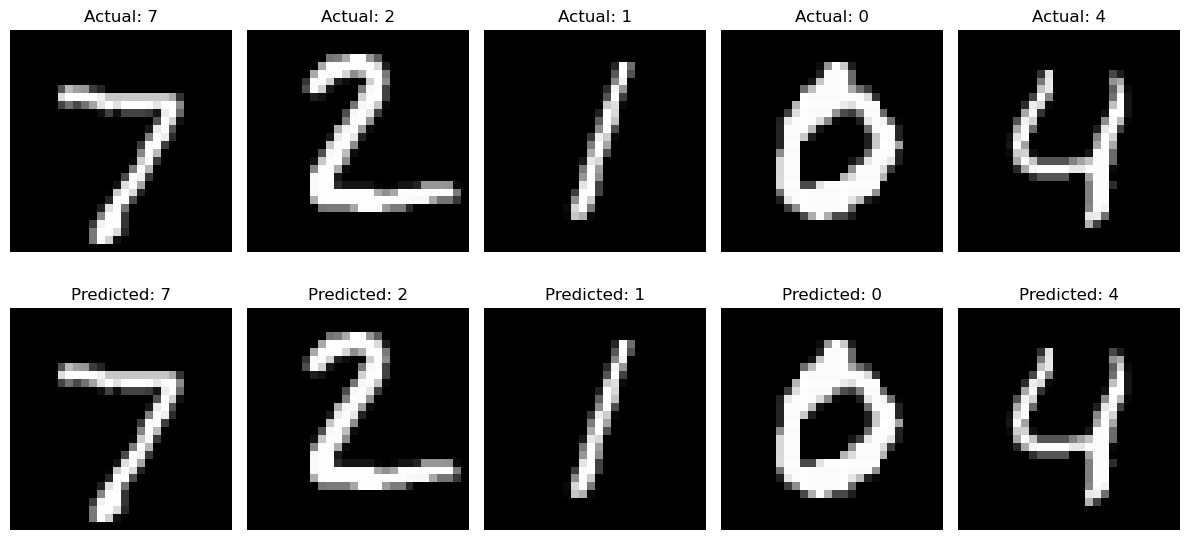

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, TimeDistributed
from tensorflow.keras.utils import to_categorical

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Preprocess the data
# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data for LSTM input: (samples, time steps, features)
x_train = x_train.reshape((x_train.shape[0], 28, 28))  # (60000, 28, 28)
x_test = x_test.reshape((x_test.shape[0], 28, 28))  # (10000, 28, 28)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Step 3: Build the LSTM Model
model = Sequential()
model.add(LSTM(128, input_shape=(28, 28), return_sequences=False))
model.add(Dense(10, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Step 6: Make predictions
predictions = model.predict(x_test)

# Display some actual vs predicted results
num_images = 5
plt.figure(figsize=(12, 6))

for i in range(num_images):
    plt.subplot(2, num_images, i + 1)  # Original images
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Actual: {np.argmax(y_test[i])}')
    plt.axis('off')
    
    plt.subplot(2, num_images, i + 1 + num_images)  # Predicted images
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[i])}')
    plt.axis('off')

plt.tight_layout()
plt.show()
